In [1]:
import pandas as pd

# read in the file
df_ipeds = pd.read_csv('IPEDS_Data_110122.csv')

# drop all rows where it doesn't have the SAT MATH 75 percentile score
for year in ('2017', '2018', '2019'):
    df_ipeds.dropna(subset=[f'SAT Math 75th percentile score (ADM{year}_RV)'], inplace = True)
    
    df_ipeds.dropna(subset = [f'SAT Evidence-Based Reading and Writing 75th percentile score (ADM{year}_RV)'], inplace = True)

df_ipeds.head()

,UnitID,Institution Name,Number of undergraduate students awarded federal state local institutional or other sources of grant aid (SFA1920_RV),Percent of undergraduate students awarded federal state local institutional or other sources of grant aid (SFA1920_RV),Total number of undergraduates - financial aid cohort (SFA1920_RV),Average amount of federal state local institutional or other sources of grant aid awarded to undergraduate students (SFA1920_RV),Number of undergraduate students awarded Pell grants (SFA1920_RV),Percent of undergraduate students awarded Pell grants (SFA1920_RV),Total amount of Pell grant aid awarded to undergraduate students (SFA1920_RV),Average amount Pell grant aid awarded to undergraduate students (SFA1920_RV),...,SAT Math 25th percentile score (ADM2017_RV),SAT Math 75th percentile score (ADM2017_RV),ACT Composite 25th percentile score (ADM2017_RV),ACT Composite 75th percentile score (ADM2017_RV),ACT English 25th percentile score (ADM2017_RV),ACT English 75th percentile score (ADM2017_RV),ACT Math 25th percentile score (ADM2017_RV),ACT Math 75th percentile score (ADM2017_RV),Open admission policy (IC2017),Unnamed: 230
7,222178,Abilene Christian University,3436.0,97.0,3525.0,21092.0,899.0,26.0,4226334.0,4701.0,...,515.0,600.0,21.0,26.0,20.0,26.0,20.0,26.0,2.0,NaN
9,138558,Abraham Baldwin Agricultural College,3379.0,86.0,3927.0,5021.0,1528.0,39.0,7135499.0,4670.0,...,450.0,540.0,17.0,22.0,15.0,22.0,16.0,21.0,2.0,NaN
56,126182,Adams State University,1304.0,67.0,1958.0,9585.0,804.0,41.0,3726086.0,4634.0,...,450.0,540.0,17.0,22.0,15.0,22.0,16.0,22.0,2.0,NaN
57,188429,Adelphi University,4691.0,88.0,5360.0,20561.0,1460.0,27.0,6925058.0,4743.0,...,530.0,620.0,22.0,27.0,21.0,27.0,21.0,27.0,2.0,NaN
60,168528,Adrian College,1730.0,97.0,1782.0,29050.0,624.0,35.0,2747214.0,4403.0,...,470.0,568.0,19.0,25.0,18.0,25.0,16.0,25.0,2.0,NaN


In [2]:
bad_col = ['Percent of graduate enrollment that are American Indian or Alaska Native',
           'Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander',
           'Percent of graduate enrollment that are Asian',
           'Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander',
           'Percent of graduate enrollment that are Black or African American',
           'Percent of graduate enrollment that are Hispanic/Latino',
           'Percent of graduate enrollment that are White',
           'Percent of graduate enrollment that are two or more races',
           'Percent of graduate enrollment that are Race/ethnicity unknown',
           'Percent of graduate enrollment that are Nonresident Alien',
           'Percent of graduate enrollment that are women',
           'Applicants men', 
           'Applicants women',
           'Admissions men',
           'Admissions women',
           'Enrolled  men', 
           'Enrolled  women',
           'Enrolled full time men',
           'Enrolled full time women', 
           'Enrolled part time men', 
           'Enrolled part time women', 
           'FIPS state code', 
           'Open admission policy']

In [3]:
li = []
for bad in bad_col:
    for col in df_ipeds.columns:
        if bad in col:
            li.append(col)
            
df_ipeds.drop(li, axis=1, inplace=True)

In [4]:
df_ipeds.columns[-75:]

Index(['Total price for in-state students living off campus (with family)  2018-19 (DRVIC2018)',
       'Total price for out-of-state students living off campus (with family)  2018-19 (DRVIC2018)',
       'Full-time undergraduate enrollment (DRVEF2018_RV)',
       'Percent of undergraduate enrollment that are American Indian or Alaska Native (DRVEF2018_RV)',
       'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander (DRVEF2018_RV)',
       'Percent of undergraduate enrollment that are Asian (DRVEF2018_RV)',
       'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander (DRVEF2018_RV)',
       'Percent of undergraduate enrollment that are Black or African American (DRVEF2018_RV)',
       'Percent of undergraduate enrollment that are Hispanic/Latino (DRVEF2018_RV)',
       'Percent of undergraduate enrollment that are White (DRVEF2018_RV)',
       'Percent of undergraduate enrollment that are two or more races (DRVEF2018_RV

In [5]:
# how years are labled
years = ['1718', '1819', '1920', '2017', '2018', '2019']

## ADD THE 3 UNIQUE COLUMNS TO ALL DATAFRAMES

In [6]:
import numpy as np

# first two identifying columns
iden = df_ipeds.columns[:2]

# initialize yearly dataframes
df_2017 = pd.DataFrame()
df_2018 = pd.DataFrame()
df_2019 = pd.DataFrame()

# add identifying columns to yearly dataframes
df_2017[iden] = df_ipeds[iden]
df_2018[iden] = df_ipeds[iden]
df_2019[iden] = df_ipeds[iden]

# add data to yearly dataframes
for column in df_ipeds.columns:
    if '2017' in column or '1718' in column:
        df_2017[column] = df_ipeds[column]
    if '2018' in column or '1819' in column:
        df_2018[column] = df_ipeds[column]
    if '1920' in column or '2019' in column:
        df_2019[column] = df_ipeds[column]

In [7]:
df_2017.columns

Index(['UnitID', 'Institution Name',
       'Number of undergraduate students awarded federal  state  local  institutional or other sources of grant aid (SFA1718_RV)',
       'Percent of undergraduate students awarded federal  state  local  institutional or other sources of grant aid (SFA1718_RV)',
       'Total number of undergraduates - financial aid cohort (SFA1718_RV)',
       'Average amount of federal  state  local  institutional or other sources of grant aid awarded to undergraduate students (SFA1718_RV)',
       'Number of undergraduate students awarded Pell grants (SFA1718_RV)',
       'Percent of undergraduate students awarded Pell grants (SFA1718_RV)',
       'Total amount of Pell grant aid awarded to undergraduate students (SFA1718_RV)',
       'Average amount Pell grant aid awarded to undergraduate students (SFA1718_RV)',
       'Percent of undergraduate students awarded federal student loans (SFA1718_RV)',
       'Number of undergraduate students awarded federal student l

In [8]:
for df in [df_2017, df_2018, df_2019]:
    df.dropna(axis=0, inplace=True)

In [9]:
df_2017.shape, df_2018.shape, df_2019.shape

((803, 55), (804, 55), (799, 55))

In [10]:
df_2017.head()

,UnitID,Institution Name,Number of undergraduate students awarded federal state local institutional or other sources of grant aid (SFA1718_RV),Percent of undergraduate students awarded federal state local institutional or other sources of grant aid (SFA1718_RV),Total number of undergraduates - financial aid cohort (SFA1718_RV),Average amount of federal state local institutional or other sources of grant aid awarded to undergraduate students (SFA1718_RV),Number of undergraduate students awarded Pell grants (SFA1718_RV),Percent of undergraduate students awarded Pell grants (SFA1718_RV),Total amount of Pell grant aid awarded to undergraduate students (SFA1718_RV),Average amount Pell grant aid awarded to undergraduate students (SFA1718_RV),...,SAT Evidence-Based Reading and Writing 25th percentile score (ADM2017_RV),SAT Evidence-Based Reading and Writing 75th percentile score (ADM2017_RV),SAT Math 25th percentile score (ADM2017_RV),SAT Math 75th percentile score (ADM2017_RV),ACT Composite 25th percentile score (ADM2017_RV),ACT Composite 75th percentile score (ADM2017_RV),ACT English 25th percentile score (ADM2017_RV),ACT English 75th percentile score (ADM2017_RV),ACT Math 25th percentile score (ADM2017_RV),ACT Math 75th percentile score (ADM2017_RV)
7,222178,Abilene Christian University,3574.0,97.0,3666.0,18914.0,989.0,27.0,4176566.0,4223.0,...,510.0,620.0,515.0,600.0,21.0,26.0,20.0,26.0,20.0,26.0
9,138558,Abraham Baldwin Agricultural College,3483.0,68.0,5140.0,4393.0,2328.0,45.0,8978887.0,3857.0,...,470.0,570.0,450.0,540.0,17.0,22.0,15.0,22.0,16.0,21.0
56,126182,Adams State University,1456.0,75.0,1949.0,8361.0,944.0,48.0,4548663.0,4818.0,...,430.0,540.0,450.0,540.0,17.0,22.0,15.0,22.0,16.0,22.0
57,188429,Adelphi University,4599.0,87.0,5266.0,17920.0,1685.0,32.0,7387255.0,4384.0,...,530.0,620.0,530.0,620.0,22.0,27.0,21.0,27.0,21.0,27.0
60,168528,Adrian College,1607.0,96.0,1670.0,24197.0,565.0,34.0,2472156.0,4375.0,...,480.0,580.0,470.0,568.0,19.0,25.0,18.0,25.0,16.0,25.0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [60]:
def fit_IPEDS_regression(df):
    '''
    Runs a regression for a given dataframe
    
    df = dataframe
    
    
    returns:
        x: array of values
        y: array of values
        y_pred: array of predicted values
    '''

    x_feat_list = list([df.columns[7]])
    y_feat = df.columns[50]

    # initialize regression object
    reg = LinearRegression()

    # get target variable
    # (note: since we index with list -> garauanteed 2d x array, no reshape needed)
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values

    # fit regression
    reg.fit(x, y)

    # compute / store r2
    y_pred = reg.predict(x)
    
    return x,y,y_pred

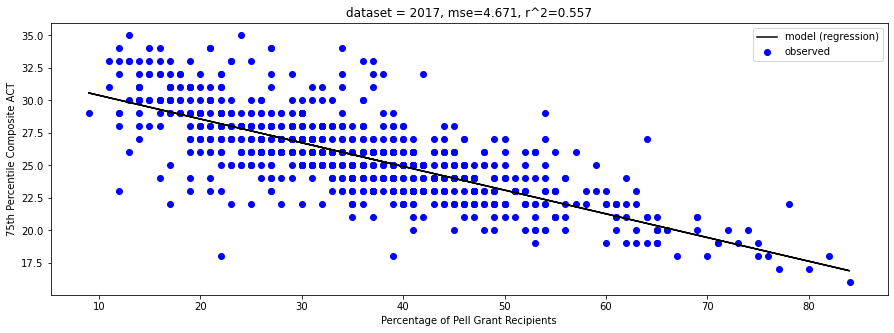

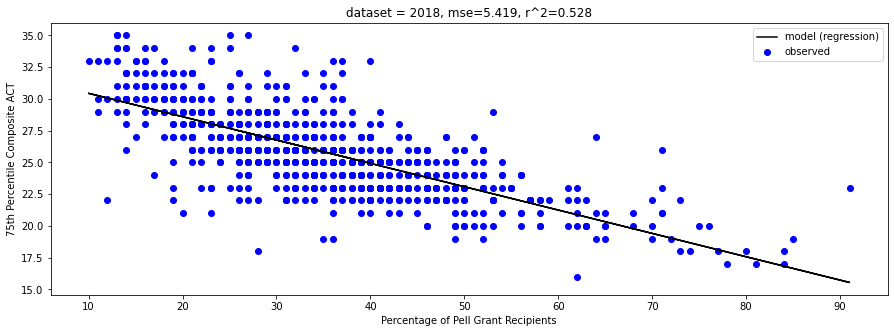

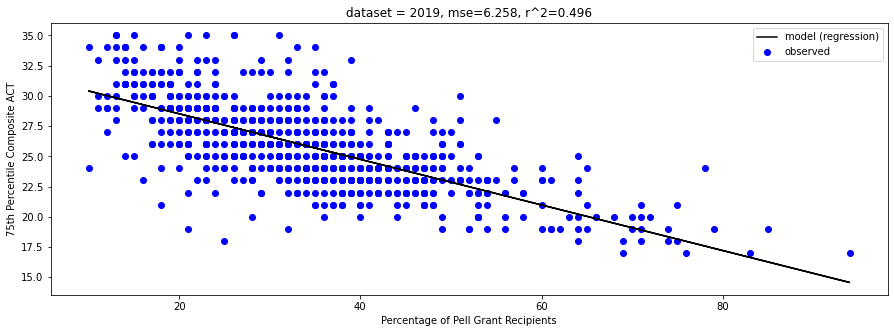

In [62]:
year = 2016

for df in [df_2017, df_2018, df_2019]:
    
    year += 1
    
    x,y,y_pred = fit_IPEDS_regression(df)
    
    # compute mean squared error
    mse = ((y_pred - y) ** 2).mean()
    r2 = r2_score(y_true=y, y_pred=y_pred)

    # plot it
    plt.scatter(x, y, label='observed', color='b')
    plt.plot(x, y_pred, label='model (regression)', color='black')
    plt.gca().set_title(f'dataset = {year}, mse={mse:.3f}, r^2={r2:.3f}')
    plt.legend()
    plt.xlabel('Percentage of Pell Grant Recipients')
    plt.ylabel('75th Percentile Composite ACT')
    plt.gcf().set_size_inches(15, 5)
    plt.show()